In [122]:
import pandas as pd
import shap
import numpy as np

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler


In [123]:
df = pd.read_csv('Cachexia_US_Dx.txt', sep=",")
df.head()


Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


,patid,cancer_metastasis,group,Diff,age,Albumin,Hemoglobin,CRP,D00,D01,...,R87,R88,R89,R90,R91,R92,R93,R94,R97,R99
0,PT080465982,0,Dx,5.3298,84,3.6,11.8,1.000,0,0,...,0,0,0,0,1,0,1,1,0,0
1,PT081815966,0,Dx,4.5469,55,3.0,7.9,0.546,0,0,...,0,0,0,0,1,0,1,1,0,0
2,PT082369586,0,Dx,4.9000,87,2.7,8.5,2.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PT083687433,0,Dx,3.0648,89,2.6,10.7,2.000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PT084394490,0,Dx,8.0013,76,2.2,10.2,92.000,0,0,...,0,0,0,0,1,0,0,0,0,0


In [124]:
df.dtypes

patid                 object
cancer_metastasis      int64
group                 object
Diff                 float64
age                    int64
                      ...   
R92                    int64
R93                    int64
R94                    int64
R97                    int64
R99                    int64
Length: 343, dtype: object

In [125]:
df = df.drop(columns=['patid'])

In [126]:
df

,cancer_metastasis,group,Diff,age,Albumin,Hemoglobin,CRP,D00,D01,D02,...,R87,R88,R89,R90,R91,R92,R93,R94,R97,R99
0,0,Dx,5.3298,84,3.6,11.8,1.000,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,Dx,4.5469,55,3.0,7.9,0.546,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0,Dx,4.9000,87,2.7,8.5,2.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Dx,3.0648,89,2.6,10.7,2.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Dx,8.0013,76,2.2,10.2,92.000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42399,0,NaN,5.9091,65,3.9,17.0,10.000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
42400,1,NaN,0.1440,69,4.3,11.2,0.700,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42401,1,NaN,2.7098,69,1.8,11.2,297.300,0,0,0,...,0,0,0,0,1,0,1,1,0,0
42402,0,NaN,2.1400,65,2.3,9.0,9.500,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [127]:
df['group'].unique()

array(['Dx', 'Pred', nan], dtype=object)

In [128]:
df['group'] = df['group'].fillna(0)

In [129]:
df['group'].unique()

array(['Dx', 'Pred', 0], dtype=object)

In [130]:
df['group'] = np.where(df['group']=='Dx', 1, df['group'])

In [131]:
df['group'].unique()

array([1, 'Pred', 0], dtype=object)

In [132]:
df = df[df["group"] != 'Pred'] 

In [133]:
df['group'].unique()

array([1, 0], dtype=object)

In [134]:
df = df.groupby('group').apply(lambda x: x.sample(500)).reset_index(drop=True)


In [135]:
df['group'].unique()

array([0, 1], dtype=object)

In [136]:
df.dtypes

cancer_metastasis      int64
group                 object
Diff                 float64
age                    int64
Albumin              float64
                      ...   
R92                    int64
R93                    int64
R94                    int64
R97                    int64
R99                    int64
Length: 342, dtype: object

In [137]:
df.columns

Index(['cancer_metastasis', 'group', 'Diff', 'age', 'Albumin', 'Hemoglobin',
       'CRP', 'D00', 'D01', 'D02',
       ...
       'R87', 'R88', 'R89', 'R90', 'R91', 'R92', 'R93', 'R94', 'R97', 'R99'],
      dtype='object', length=342)

In [106]:
#scaler = MinMaxScaler()

#df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))
#df['Albumin'] = scaler.fit_transform(df['Albumin'].values.reshape(-1,1))
#df['Hemoglobin'] = scaler.fit_transform(df['Hemoglobin'].values.reshape(-1,1))
#df['CRP'] = scaler.fit_transform(df['CRP'].values.reshape(-1,1))


In [138]:
df

,cancer_metastasis,group,Diff,age,Albumin,Hemoglobin,CRP,D00,D01,D02,...,R87,R88,R89,R90,R91,R92,R93,R94,R97,R99
0,0,0,4.1000,57,3.7,10.7,17.6,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,0,0.7500,67,4.1,11.4,11.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,2.9095,76,2.8,10.8,11.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1.5000,50,4.4,13.5,0.2,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,0.1357,62,2.8,8.9,2.6,0,0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,3.9000,77,3.7,10.4,6.0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
996,1,1,6.7813,65,3.5,14.1,0.4,0,0,0,...,0,0,0,0,1,0,1,1,0,0
997,0,1,10.1162,32,2.8,9.6,6.0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
998,1,1,11.5236,70,2.3,6.1,24.1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [139]:
X = df.drop('group',axis=1)
Y = df.group


In [140]:
X

,cancer_metastasis,Diff,age,Albumin,Hemoglobin,CRP,D00,D01,D02,D03,...,R87,R88,R89,R90,R91,R92,R93,R94,R97,R99
0,0,4.1000,57,3.7,10.7,17.6,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,0.7500,67,4.1,11.4,11.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.9095,76,2.8,10.8,11.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1.5000,50,4.4,13.5,0.2,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0.1357,62,2.8,8.9,2.6,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,3.9000,77,3.7,10.4,6.0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
996,1,6.7813,65,3.5,14.1,0.4,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
997,0,10.1162,32,2.8,9.6,6.0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
998,1,11.5236,70,2.3,6.1,24.1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [141]:
X = X.astype(float)
Y = Y.astype(float)

In [142]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: group, Length: 1000, dtype: float64

In [143]:
X = X.values
Y = Y.values

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [145]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [146]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [147]:
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)


Epoch 1/100
80/80 [==============================] - 1s 3ms/step - loss: 0.5597 - accuracy: 0.7203 - val_loss: 0.6202 - val_accuracy: 0.6750
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8281 - val_loss: 0.3081 - val_accuracy: 0.8687
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8719 - val_loss: 0.2943 - val_accuracy: 0.8875
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9031 - val_loss: 0.3391 - val_accuracy: 0.8562
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9172 - val_loss: 0.2746 - val_accuracy: 0.8875
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9266 - val_loss: 0.3023 - val_accuracy: 0.8813
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9156 - val_loss: 0.2515 - val_accuracy: 0.8938
Epoch 8/100
8

In [148]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  



7/7 [==============================] - 0s 1ms/step


In [149]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.925

In [150]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[90,  6],
       [ 9, 95]], dtype=int64)

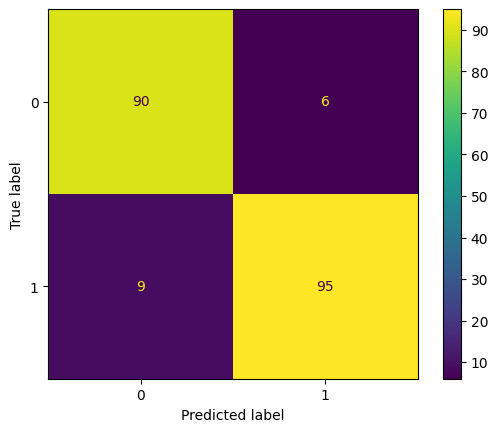

In [151]:
display = ConfusionMatrixDisplay(confusion)
display.plot()

In [188]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

Permutation explainer:  50%|█████     | 500/1000 [01:03<01:15,  6.66it/s]


KeyboardInterrupt: 

In [153]:
df

,cancer_metastasis,group,Diff,age,Albumin,Hemoglobin,CRP,D00,D01,D02,...,R87,R88,R89,R90,R91,R92,R93,R94,R97,R99
0,0,0,4.1000,57,3.7,10.7,17.6,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,0,0.7500,67,4.1,11.4,11.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,2.9095,76,2.8,10.8,11.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1.5000,50,4.4,13.5,0.2,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,0.1357,62,2.8,8.9,2.6,0,0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,3.9000,77,3.7,10.4,6.0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
996,1,1,6.7813,65,3.5,14.1,0.4,0,0,0,...,0,0,0,0,1,0,1,1,0,0
997,0,1,10.1162,32,2.8,9.6,6.0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
998,1,1,11.5236,70,2.3,6.1,24.1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


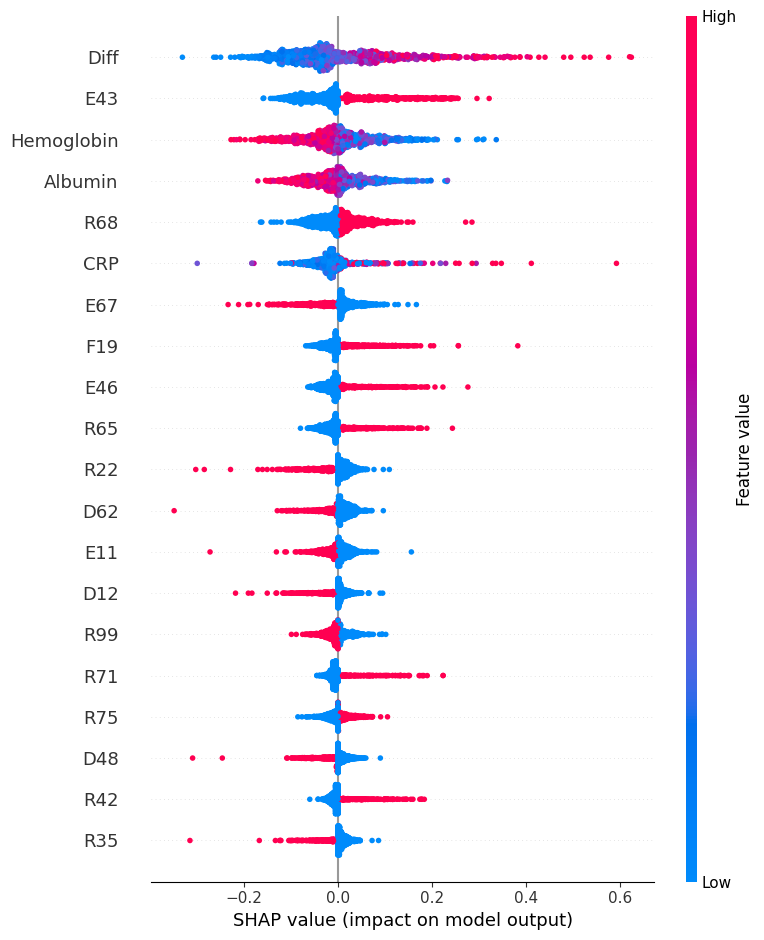

In [ ]:
shap.summary_plot(shap_values, X, feature_names=df.columns.drop(['group', 'F17', 'E66']), max_display=20)

In [ ]:
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0),  instance_order=shap_values.sum(1),  max_display=20)

AttributeError: 'list' object has no attribute 'abs'

In [171]:
shap_values.data

array([[ 0.    ,  4.1   , 57.    , ...,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.75  , 67.    , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  2.9095, 76.    , ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 0.    , 10.1162, 32.    , ...,  1.    ,  0.    ,  0.    ],
       [ 1.    , 11.5236, 70.    , ...,  0.    ,  1.    ,  0.    ],
       [ 0.    ,  8.12  , 75.    , ...,  1.    ,  0.    ,  0.    ]])

In [172]:
df

,cancer_metastasis,group,Diff,age,Albumin,Hemoglobin,CRP,D00,D01,D02,...,R87,R88,R89,R90,R91,R92,R93,R94,R97,R99
0,0,0,4.1000,57,3.7,10.7,17.6,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,0,0.7500,67,4.1,11.4,11.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,2.9095,76,2.8,10.8,11.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1.5000,50,4.4,13.5,0.2,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,0.1357,62,2.8,8.9,2.6,0,0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,3.9000,77,3.7,10.4,6.0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
996,1,1,6.7813,65,3.5,14.1,0.4,0,0,0,...,0,0,0,0,1,0,1,1,0,0
997,0,1,10.1162,32,2.8,9.6,6.0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
998,1,1,11.5236,70,2.3,6.1,24.1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [191]:
import xgboost

In [199]:
X = df.drop('group',axis=1)
Y = df.group


In [200]:
model = xgboost.XGBClassifier(nestimators=341, max_depth=2).fit(X, Y)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[16:21:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "nestimators" } are not used.



In [201]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X[:1000])

[16:21:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


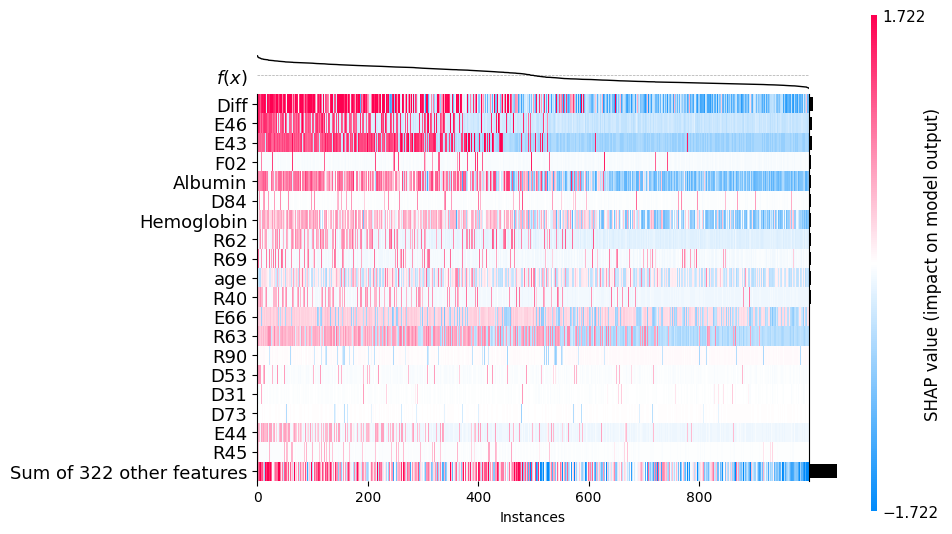

In [208]:
shap.plots.heatmap(shap_values, max_display=20, feature_values=shap_values.abs.max(0),  instance_order=shap_values.sum(1))
